### Diabetes Prediction using various Regression Models

This notebook demonstrates a machine learning workflow to predict diabetes progression using various regression models. The dataset used is the scikit-learn diabetes dataset, which includes ten baseline variables for 442 diabetes patients and a quantitative measure of disease progression one year after baseline.

### Data Loading and Initial Exploration

We start by importing necessary libraries and loading the Diabetes dataset from `sklearn.datasets`. The dataset is loaded as a Pandas DataFrame for easy manipulation. `X` represents the feature matrix, and `y` represents the target variable (disease progression).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame = True)

The `data.DESCR` provides a detailed description of the dataset, including the number of instances, attributes, and their descriptions. This is crucial for understanding the features we are working with.

In [3]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [4]:
X = data.data
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
y = data.target # Disease progression after 1 year of baseline
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


The `X.value_counts()` for 'sex' shows the distribution of the two numerical values representing sex, indicating a relatively balanced dataset in terms of this feature.

In [6]:
X['sex'].value_counts()

,count
sex,
-0.044642,235
0.050680,207


We extract the feature names for better interpretability later. `X.head()`, `X.tail()`, `X.describe()`, and `X.info()` provide initial insights into the data, such as the first/last few rows, statistical summaries, and data types/missing values.

In [7]:
feature_names = data.feature_names
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [10]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


###  Data Preprocessing

Before training the models, we split the data into training and testing sets using `train_test_split` to evaluate the model's performance on unseen data. We also scale the features using `StandardScaler` to ensure all features contribute equally to the model training process, preventing features with larger values from dominating. The scaling is applied separately to training and testing sets to avoid data leakage.

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.2,random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_train),columns = feature_names)

We visualize the distribution of scaled features using histograms to check for normality or skewness. These plots help us understand the data distribution after scaling.

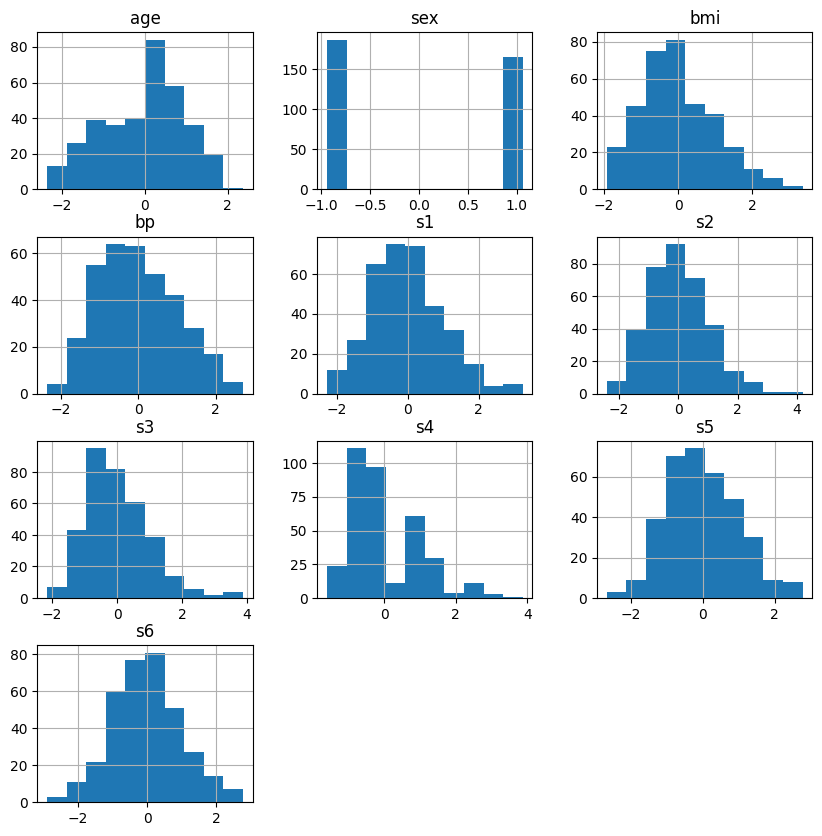

In [14]:
X_train_scaled.hist(bins = 10,figsize = (10,10))
plt.show()

Scatter matrix plots are used to visualize relationships between selected demographic features (`age`, `sex`, `bmi`, `bp`) to identify potential correlations and distributions.

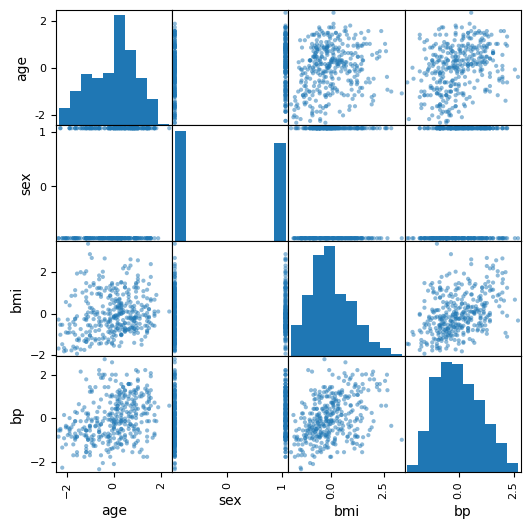

In [15]:
attributes = ['age','sex','bmi','bp']
pd.plotting.scatter_matrix(X_train_scaled[attributes], figsize=(6, 6))
plt.show()

Similarly, we visualize the relationships among the six blood serum measurements (`s1` through `s6`) using another scatter matrix. This helps in understanding their individual distributions and pairwise correlations.

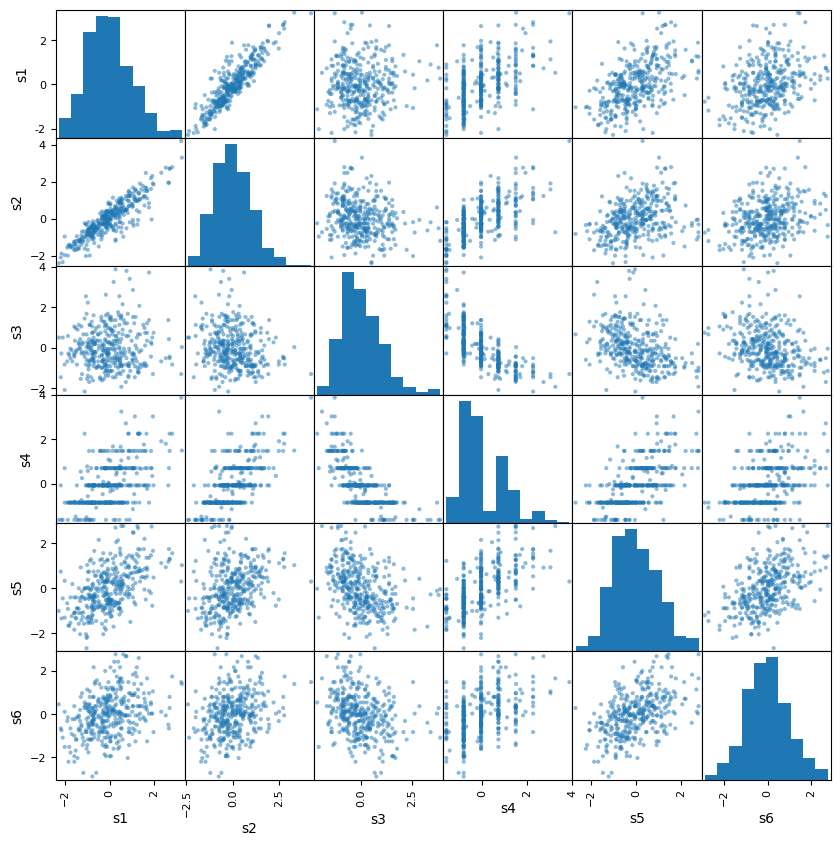

In [16]:
blood_serums = ['s1','s2','s3','s4','s5','s6']
pd.plotting.scatter_matrix(X_train_scaled[blood_serums], figsize=(10, 10))
plt.show()

A heatmap of the correlation matrix for all features helps in understanding multicollinearity. The colors indicate the strength and direction of the correlation between each pair of features.

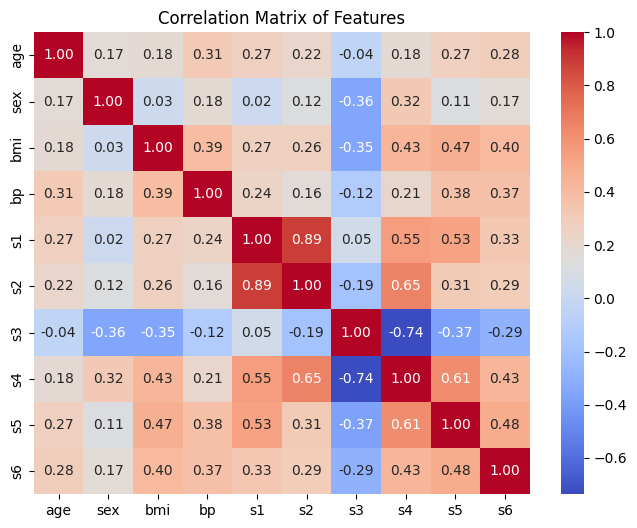

In [17]:
corr_matrix = X_train_scaled.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

A bar plot shows the correlation of each feature with the target variable (`y_train`). This helps in identifying which features have the strongest linear relationship with the disease progression.

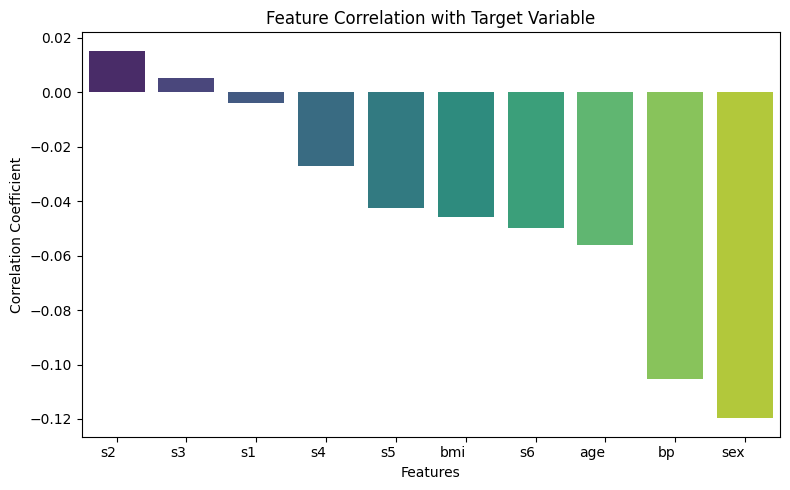

In [18]:
correlations = X_train_scaled.corrwith(y_train).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis', hue=correlations.index, legend=False)
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks( ha='right')
plt.tight_layout()
plt.show()

Finally, a histogram displays the distribution of the target variable (`y_train`) itself. This provides insight into the range and frequency of disease progression values in our training set.

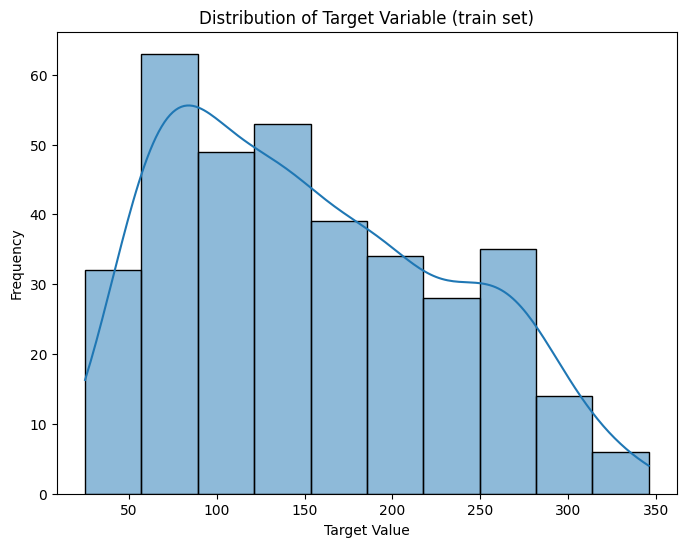

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Target Variable (train set)')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [20]:
X_test_scaled = pd.DataFrame(std_scaler.transform(X_test),columns = feature_names)

###  Model Training and Evaluation

We train and evaluate several regression models: Random Forest, Ridge Regression, Gradient Boosting Regressor, and an ensemble Voting Regressor. For each model, we perform hyperparameter tuning using `GridSearchCV` to find the best set of parameters that minimize the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R2 score.


#### Random Forest Regressor

We initialize a `RandomForestRegressor` and define a `param_grid` for `GridSearchCV`. The grid search systematically works through multiple combinations of parameter tunes, cross-validating each to determine which one gives the best performance.

In [21]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(random_state = 42)
RF_reg.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

The best parameters found by `GridSearchCV` are then used to train the `best_rf` model. Cross-validation scores are computed to assess the model's robustness, and a learning curve is plotted to visualize how the model's performance changes with increasing training data size.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [500,800],
    "max_depth": [ 5, 10,15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['log2'],
}

grid_search = GridSearchCV(
    estimator=RF_reg,
    param_grid=param_grid,
    cv=10,
    scoring="neg_root_mean_squared_error",
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best RMSE from Grid Search:", -grid_search.best_score_)


best_rf = grid_search.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE from Grid Search: 56.97301072825545


In [23]:
best_rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', min_samples_leaf=4,
                      n_estimators=500, random_state=42)

In [24]:
from sklearn.model_selection import cross_val_score
best_rf_cvs = cross_val_score(best_rf,X_train_scaled,y_train,cv = 10,scoring  = 'neg_root_mean_squared_error')
best_rf_cvs

array([-47.45399649, -64.08212192, -54.79093316, -66.71322825,
       -61.70422891, -46.61405754, -57.3908332 , -61.76096307,
       -53.12779832, -56.09194642])

In [25]:
f'{best_rf_cvs.mean()} ± {best_rf_cvs.std()}'

'-56.97301072825545 ± 6.396387469730564'

A learning curve for the `best_rf` model is plotted to visualize how the model's performance (RMSE) changes with increasing training data size. This helps in understanding bias-variance trade-off: a small gap between training and cross-validation scores suggests low variance (good generalization), while a large gap suggests high variance (overfitting). If both scores are low and converge, the model is well-fit. If both are low but do not converge, more data might help. If both are high, the model might be underfitting and require more complex features or algorithms.

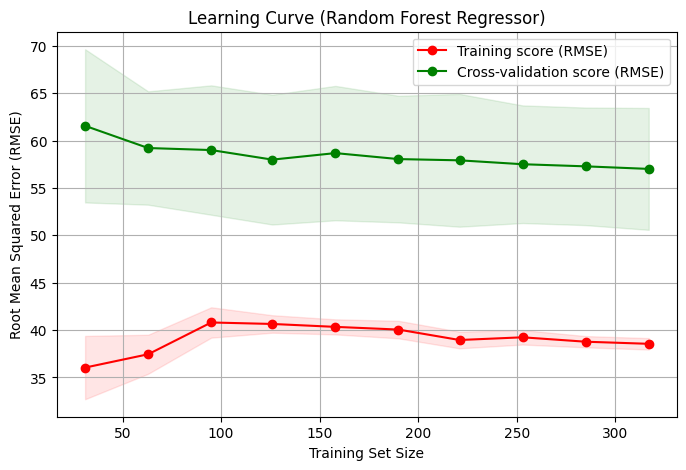

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf,
    X=X_train_scaled,
    y=y_train,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Convert negative RMSE to positive RMSE for plotting
train_scores = -train_scores
test_scores = -test_scores

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score (RMSE)')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score (RMSE)')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve (Random Forest Regressor)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [27]:
best_rf_predicted = best_rf.predict(X_test_scaled)
best_rf_predicted

array([145.33226888, 160.73925238, 151.53401242, 251.63646736,
       125.87576982, 106.55639703, 222.00422025, 203.76767082,
       136.38590376, 168.72126141, 104.12724156, 163.17207109,
        92.95048255, 234.71957756,  90.79237023, 120.35692527,
       231.45383834, 258.82200287, 185.50116916, 231.07577675,
       182.72831957, 112.72954956,  76.85655755, 202.92987265,
       140.6100341 , 169.97443997, 190.89709563, 163.30266398,
        76.34019418, 116.59747448, 176.42217391, 109.09344251,
       170.64170524, 197.66027676, 161.73717361, 205.04006683,
       119.19529292, 131.95773445, 167.93115332,  78.89436698,
        86.30135935, 106.01710687, 167.62051766, 159.08157859,
       160.36011282,  90.5166446 ,  79.88246347, 112.98337054,
        80.44131048, 153.87565928, 123.58464195,  84.99973136,
       154.34494437,  98.96775564, 189.38113847, 130.11807318,
       102.43143729, 218.1737846 ,  95.59109892,  88.21225429,
       161.81689445, 191.25438488, 131.48995535, 110.28

###  Model Evaluation Metrics

After training, each model's performance is evaluated on the test set using the following metrics:

*   **Root Mean Squared Error (RMSE)**: RMSE is the square root of the average of the squared differences between predicted and actual values. It gives a relatively high weight to large errors, making it useful when large errors are particularly undesirable. A lower RMSE indicates a better fit.

*   **Mean Absolute Error (MAE)**: MAE is the average of the absolute differences between predicted and actual values. It's less sensitive to outliers compared to RMSE because it doesn't square the errors. A lower MAE indicates a better fit.

*   **R2 Score (Coefficient of Determination)**: R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean, and 0 indicates that the model explains no variability. A higher R2 score indicates a better fit.

In [28]:
from sklearn.metrics import root_mean_squared_error
best_rf_rmse = root_mean_squared_error(y_test,best_rf_predicted)
best_rf_rmse

52.94312821844754

In [29]:
from sklearn.metrics import mean_absolute_error
best_rf_mae = mean_absolute_error(y_test,best_rf_predicted)
best_rf_mae

43.44187554371548

In [30]:
from sklearn.metrics import r2_score
best_rf_r2 = r2_score(y_test,best_rf_predicted)
best_rf_r2

0.470952332322349

#### Ridge Regression (Linear Regression with L2 Regularization)

We train a `Ridge` regressor, which is a type of linear regression that includes L2 regularization to prevent overfitting. `GridSearchCV` is again used to find the optimal `alpha` (regularization strength) parameter.

In [31]:
from sklearn.linear_model import LinearRegression
LR_reg = LinearRegression()
LR_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
from sklearn.linear_model import Ridge

# Tuning for Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_reg = Ridge()

grid_search_ridge = GridSearchCV(
    estimator=ridge_reg,
    param_grid=param_grid_ridge,
    cv=10,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_ridge.fit(X_train_scaled, y_train)

print("Best alpha parameter for Ridge Regression:", grid_search_ridge.best_params_)
print("Best RMSE for Ridge Regression:", -grid_search_ridge.best_score_)

best_ridge = grid_search_ridge.best_estimator_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best alpha parameter for Ridge Regression: {'alpha': 1.0}
Best RMSE for Ridge Regression: 55.589660191802125


In [33]:
best_ridge.fit(X_train_scaled,y_train)

Ridge()

In [34]:
LR_cvs = cross_val_score(best_ridge,X_train_scaled,y_train,cv = 10,scoring = 'neg_root_mean_squared_error')
LR_cvs

array([-50.61441305, -57.23975597, -51.35262026, -60.77906168,
       -57.65129846, -46.69072614, -51.44409855, -60.59682811,
       -58.80569486, -60.72210484])

In [35]:
f'{LR_cvs.mean()} ± {LR_cvs.std()}'

'-55.589660191802125 ± 4.845017584393662'

The learning curve for the `best_ridge` model provides insights into its training and cross-validation performance with respect to the training set size. Similar to other learning curves, it helps diagnose issues like high bias (underfitting) if both training and cross-validation scores are high and converge, or high variance (overfitting) if the training score is significantly lower than the cross-validation score.

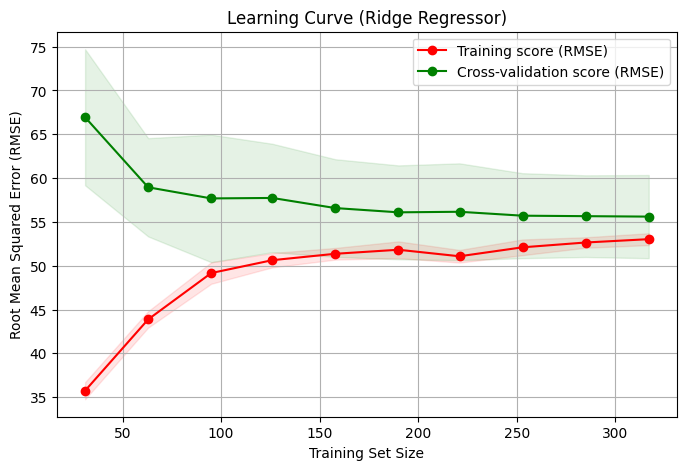

In [36]:
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    estimator=best_ridge,
    X=X_train_scaled,
    y=y_train,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Convert negative RMSE to positive RMSE for plotting
train_scores_lr = -train_scores_lr
test_scores_lr = -test_scores_lr

# Calculate mean and standard deviation for training and test scores
train_scores_mean_lr = np.mean(train_scores_lr, axis=1)
train_scores_std_lr = np.std(train_scores_lr, axis=1)
test_scores_mean_lr = np.mean(test_scores_lr, axis=1)
test_scores_std_lr = np.std(test_scores_lr, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes_lr, train_scores_mean_lr, 'o-', color='r', label='Training score (RMSE)')
plt.fill_between(train_sizes_lr, train_scores_mean_lr - train_scores_std_lr,
                 train_scores_mean_lr + train_scores_std_lr, alpha=0.1, color='r')
plt.plot(train_sizes_lr, test_scores_mean_lr, 'o-', color='g', label='Cross-validation score (RMSE)')
plt.fill_between(train_sizes_lr, test_scores_mean_lr - test_scores_std_lr,
                 test_scores_mean_lr + test_scores_std_lr, alpha=0.1, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve (Ridge Regressor)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [37]:
LR_predicted = best_ridge.predict(X_test_scaled)
LR_predicted

array([139.86277405, 179.9582406 , 135.71687469, 292.11578228,
       123.18931464,  92.63420961, 257.85540931, 182.98437571,
        88.57110276, 109.34130188,  94.44005222, 166.79559349,
        56.34471823, 206.28537014,  99.83697447, 131.14352119,
       220.13422127, 249.66324991, 196.24491272, 217.48836765,
       207.27026897,  88.62662434,  71.00067256, 188.77371926,
       155.27179344, 160.11509377, 188.68359243, 179.4462606 ,
        48.58194512, 109.46862532, 176.30864771,  87.81175183,
       132.57482949, 183.48671555, 173.64887924, 190.57967229,
       123.89852066, 119.22466026, 147.3190418 ,  59.64849436,
        72.53769889, 107.79400092, 164.47289681, 153.51402972,
       172.19580463,  62.65517635,  73.5923177 , 112.86223345,
        53.52690481, 165.85907297, 153.72729198,  63.69903686,
       106.37934882, 108.94605495, 174.12346145, 156.07183591,
        94.49282843, 209.90083637, 119.67133314,  75.31549064,
       187.08319266, 205.38638319, 140.93273277, 105.55

In [38]:
LR_rmse = root_mean_squared_error(y_test,LR_predicted)
LR_rmse

53.777454065343896

In [39]:
LR_mae = mean_absolute_error(y_test,LR_predicted)
LR_mae

42.81199941834889

In [40]:
LR_r2 = r2_score(y_test,LR_predicted)
LR_r2

0.45414652070698225

#### Gradient Boosting Regressor

The `GradientBoostingRegressor` is another ensemble model that builds trees sequentially, with each new tree correcting errors made by previous ones. Hyperparameter tuning is performed using `GridSearchCV` for parameters like `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_gbr = GridSearchCV(
    estimator=gbr_reg,
    param_grid=param_grid_gbr,
    cv=10,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_gbr.fit(X_train_scaled, y_train)

print("\nBest parameters for Gradient Boosting Regressor:", grid_search_gbr.best_params_)
print("Best RMSE for Gradient Boosting Regressor:", -grid_search_gbr.best_score_)

best_gbr = grid_search_gbr.best_estimator_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE for Gradient Boosting Regressor: 59.0962693466732


The learning curve for the `best_gbr` model provides insights into its training and cross-validation performance with respect to the training set size. This curve helps us assess if the model is learning effectively from the data and generalizing well to unseen data. A converging gap between training and cross-validation scores typically indicates a good fit, while a significant gap suggests potential overfitting, and high scores for both suggest underfitting.

In [42]:
best_gbr.fit(X_train_scaled,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)

In [43]:
gbr_cvs = cross_val_score(best_gbr,X_train_scaled,y_train,cv = 10,scoring = 'neg_root_mean_squared_error')
gbr_cvs

array([-51.42554032, -65.22453559, -58.26053962, -72.54397863,
       -61.50026727, -47.7753351 , -59.42626374, -60.75889691,
       -55.63047234, -58.41686394])

In [44]:
f'{gbr_cvs.mean()} ± {gbr_cvs.std()}'

'-59.0962693466732 ± 6.536240399044997'

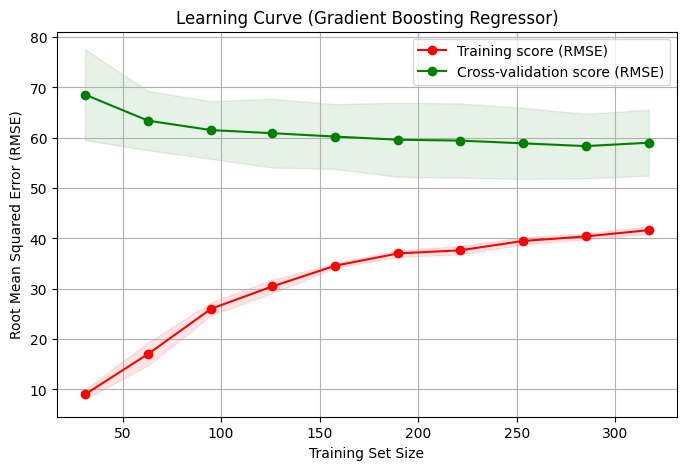

In [45]:
# Plotting the learning curve for Gradient Boosting Regressor
train_sizes_gbr, train_scores_gbr, test_scores_gbr = learning_curve(
    estimator=best_gbr,
    X=X_train_scaled,
    y=y_train,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Convert negative RMSE to positive RMSE for plotting
train_scores_gbr = -train_scores_gbr
test_scores_gbr = -test_scores_gbr

# Calculate mean and standard deviation for training and test scores
train_scores_mean_gbr = np.mean(train_scores_gbr, axis=1)
train_scores_std_gbr = np.std(train_scores_gbr, axis=1)
test_scores_mean_gbr = np.mean(test_scores_gbr, axis=1)
test_scores_std_gbr = np.std(test_scores_gbr, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes_gbr, train_scores_mean_gbr, 'o-', color='r', label='Training score (RMSE)')
plt.fill_between(train_sizes_gbr, train_scores_mean_gbr - train_scores_std_gbr,
                 train_scores_mean_gbr + train_scores_std_gbr, alpha=0.1, color='r')
plt.plot(train_sizes_gbr, test_scores_mean_gbr, 'o-', color='g', label='Cross-validation score (RMSE)')
plt.fill_between(train_sizes_gbr, test_scores_mean_gbr - test_scores_std_gbr,
                 test_scores_mean_gbr + test_scores_std_gbr, alpha=0.1, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve (Gradient Boosting Regressor)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [46]:
best_gbr_predicted = best_gbr.predict(X_test_scaled)
best_gbr_predicted

array([156.94591071, 181.05110252, 159.33724481, 251.57418191,
       125.9382023 , 107.72872673, 232.20482287, 219.22614009,
       146.10521853, 165.94953162, 101.42478597, 172.56656838,
        94.50837867, 233.60752017, 101.35068319, 113.381053  ,
       222.52306516, 247.54847725, 201.74451764, 233.94110498,
       177.99734253, 104.10799599,  82.30251139, 204.19029198,
       152.3677709 , 196.18225323, 195.768917  , 159.71897429,
        78.11457945, 113.30440508, 186.57665037,  98.9543896 ,
       165.71757333, 192.42240735, 163.69495764, 212.90274823,
       129.98591549, 125.78442079, 178.57134723,  79.76531188,
        84.78058047,  99.24590797, 159.51276375, 166.27077774,
       167.41933078,  85.96819408,  84.10024735, 112.33968801,
        84.47744259, 163.27912188, 132.56830046,  85.59403804,
       145.78677311, 101.25096526, 209.03764523, 143.99521847,
       100.35689575, 222.53267051,  96.12725993,  94.07540195,
       170.66500562, 174.10189298, 143.46790351,  98.75

In [47]:
best_gbr_rmse = root_mean_squared_error(y_test, best_gbr_predicted)
best_gbr_rmse

52.72565367641393

In [48]:
best_gbr_mae = mean_absolute_error(y_test, best_gbr_predicted)
best_gbr_mae

43.2157617293376

In [49]:
best_gbr_r2 = r2_score(y_test, best_gbr_predicted)
best_gbr_r2

0.47528974488443154

#### Voting Regressor

A `VotingRegressor` combines the predictions of multiple individual regressors (Random Forest, Ridge, Gradient Boosting in this case). This ensemble technique often leads to improved overall performance and generalization by leveraging the strengths of different models.

In [50]:
from sklearn.ensemble import VotingRegressor

estimators = [
    ('Random Forest Regressor', best_rf),
    ('Linear Regression', best_ridge),
    ('Gradient Boosting Regressor',best_gbr)
]

voting_reg = VotingRegressor(
    estimators=estimators,
    n_jobs=-1
)

In [51]:
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('Random Forest Regressor',
                             RandomForestRegressor(max_depth=15,
                                                   max_features='log2',
                                                   min_samples_leaf=4,
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('Linear Regression', Ridge()),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       n_estimators=300,
                                                       random_state=42))],
                n_jobs=-1)

Cross-validation scores and a learning curve for the `voting_reg` are generated to evaluate its performance characteristics.

In [52]:
voting_cvs = cross_val_score(voting_reg, X_train_scaled, y_train, cv=10, scoring='neg_root_mean_squared_error')
voting_cvs

array([-48.86604929, -61.34542692, -53.80525265, -65.8117591 ,
       -59.03655599, -45.52292352, -54.87128842, -60.3402516 ,
       -54.87195661, -57.50734966])

In [53]:
f'{voting_cvs.mean()} ± {voting_cvs.std()}'

'-56.19788137442674 ± 5.681627991208476'

The learning curve for the `voting_reg` is generated to evaluate its performance characteristics with increasing training data. As an ensemble model, the Voting Regressor's learning curve helps to confirm if the combination of individual models is effectively reducing bias and variance, leading to stable and improved generalization performance as more data becomes available.

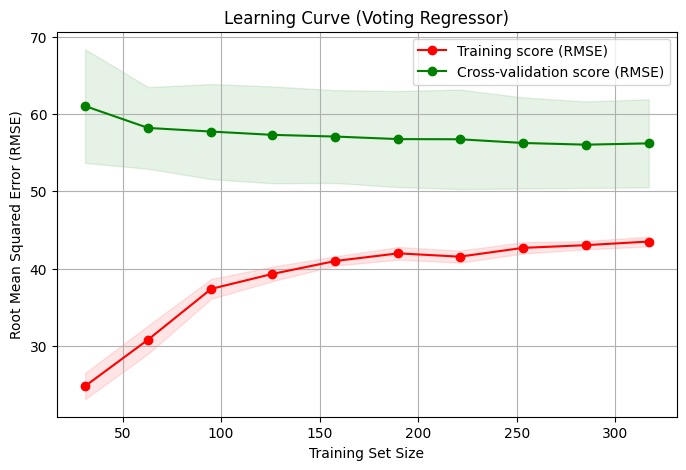

In [54]:
train_sizes_vote, train_scores_vote, test_scores_vote = learning_curve(
    estimator=voting_reg,
    X=X_train_scaled,
    y=y_train,
    cv=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Convert negative RMSE to positive RMSE for plotting
train_scores_vote = -train_scores_vote
test_scores_vote = -test_scores_vote

# Calculate mean and standard deviation for training and test scores
train_scores_mean_vote = np.mean(train_scores_vote, axis=1)
train_scores_std_vote = np.std(train_scores_vote, axis=1)
test_scores_mean_vote = np.mean(test_scores_vote, axis=1)
test_scores_std_vote = np.std(test_scores_vote, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes_vote, train_scores_mean_vote, 'o-', color='r', label='Training score (RMSE)')
plt.fill_between(train_sizes_vote, train_scores_mean_vote - train_scores_std_vote,
                 train_scores_mean_vote + train_scores_std_vote, alpha=0.1, color='r')
plt.plot(train_sizes_vote, test_scores_mean_vote, 'o-', color='g', label='Cross-validation score (RMSE)')
plt.fill_between(train_sizes_vote, test_scores_mean_vote - test_scores_std_vote,
                 test_scores_mean_vote + test_scores_std_vote, alpha=0.1, color='g')

plt.xlabel('Training Set Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve (Voting Regressor)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [55]:
voting_predicted = voting_reg.predict(X_test_scaled)
voting_predicted

array([147.38031788, 173.9161985 , 148.86271064, 265.10881052,
       125.00109559, 102.30644446, 237.35481747, 201.99272887,
       123.68740835, 148.00403163,  99.99735992, 167.51141099,
        81.26785982, 224.87082262,  97.32667596, 121.62716649,
       224.70370826, 252.01124334, 194.49686651, 227.50174979,
       189.33197702, 101.82138996,  76.71991383, 198.63129463,
       149.41653281, 175.42392899, 191.78320169, 167.48929962,
        67.67890625, 113.12350163, 179.76915733,  98.61986131,
       156.31136936, 191.18979989, 166.36033683, 202.84082912,
       124.35990969, 125.65560517, 164.60718078,  72.76939107,
        81.20654624, 104.35233858, 163.86872607, 159.62212868,
       166.65841608,  79.71333834,  79.19167618, 112.72843067,
        72.81521929, 161.00461805, 136.6267448 ,  78.09760209,
       135.50368877, 103.05492528, 190.84741505, 143.39504252,
        99.09372049, 216.86909716, 103.796564  ,  85.86771563,
       173.18836424, 190.24755368, 138.63019721, 104.86

In [56]:
voting_rmse = root_mean_squared_error(y_test,voting_predicted)
voting_rmse

52.16754237226793

In [57]:
voting_mae = mean_absolute_error(y_test,voting_predicted)
voting_mae

42.61123769434366

In [58]:
voting_r2 = r2_score(y_test,voting_predicted)
voting_r2

0.486339273327848

###  Visualizing Predictions (Voting Regressor)

We visualize the actual versus predicted values for the best-performing model (Voting Regressor). The scatter plot of actual vs. predicted values helps assess how closely predictions align with true values.

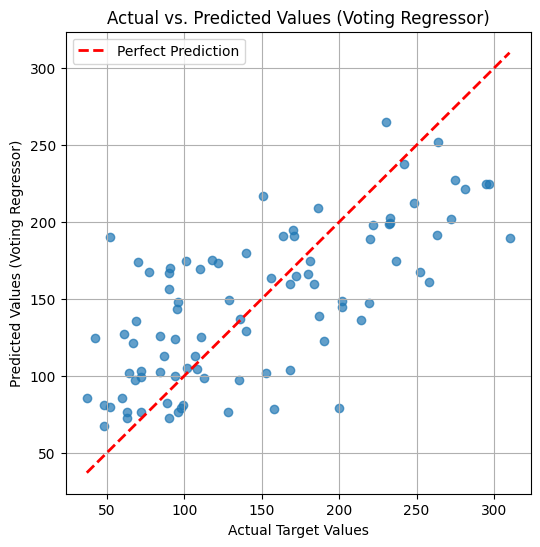

In [59]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, voting_predicted, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction') # Added explicit label
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values (Voting Regressor)')
plt.title('Actual vs. Predicted Values (Voting Regressor)')
plt.grid(True)
plt.legend()
plt.show()

###  Visualizing Residuals (Voting Regressor)

We visualize the residuals vs predicted values for the best-performing model (Voting Regressor).The residuals plot (residuals vs. predicted values) helps check for homoscedasticity (constant variance of errors) and systematic patterns in errors, indicating potential issues with the model.

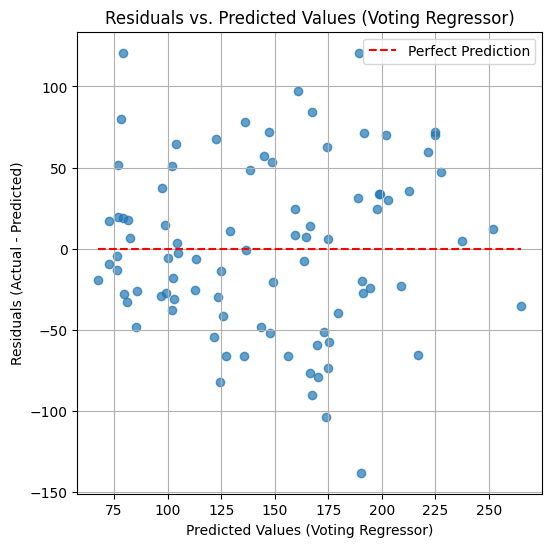

In [60]:
residuals = y_test - voting_predicted

plt.figure(figsize=(6, 6))
plt.scatter(voting_predicted, residuals, alpha=0.7)
plt.hlines(y=0, xmin=voting_predicted.min(), xmax=voting_predicted.max(), colors='red', linestyles='--', label='Perfect Prediction')
plt.xlabel('Predicted Values (Voting Regressor)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted Values (Voting Regressor)')
plt.grid(True)
plt.legend()
plt.show()

###  Permutation Importance

Permutation importance is used to measure the importance of each feature for the `VotingRegressor`. It works by shuffling the values of a single feature and observing how much the model's performance (RMSE in this case) decreases. Features that cause a larger drop in performance when shuffled are considered more important.

In [61]:
from sklearn.inspection import permutation_importance

perm_importance_results = permutation_importance(
    voting_reg,
    X_test_scaled,
    y_test,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

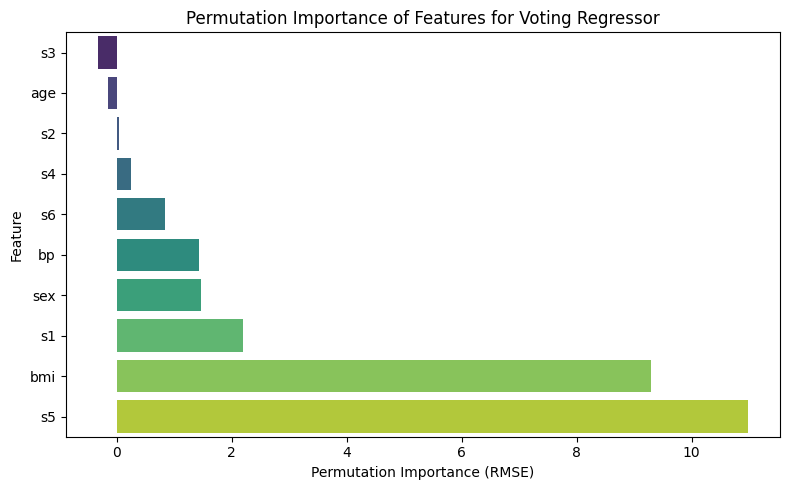

In [62]:
sorted_idx = perm_importance_results.importances_mean.argsort()
plt.figure(figsize=(8, 5))
sns.barplot(x=perm_importance_results.importances_mean[sorted_idx], y=X_test_scaled.columns[sorted_idx], palette='viridis', hue=X_test_scaled.columns[sorted_idx], legend=False)
plt.xlabel("Permutation Importance (RMSE)")
plt.ylabel("Feature")
plt.title("Permutation Importance of Features for Voting Regressor")
plt.tight_layout()
plt.show()

### Model Comparison

Finally, the performance metrics (RMSE, MAE, R2 Score) of all trained models are compiled into a DataFrame and visualized using bar plots. This allows for a clear comparison of how each model performed relative to the others.

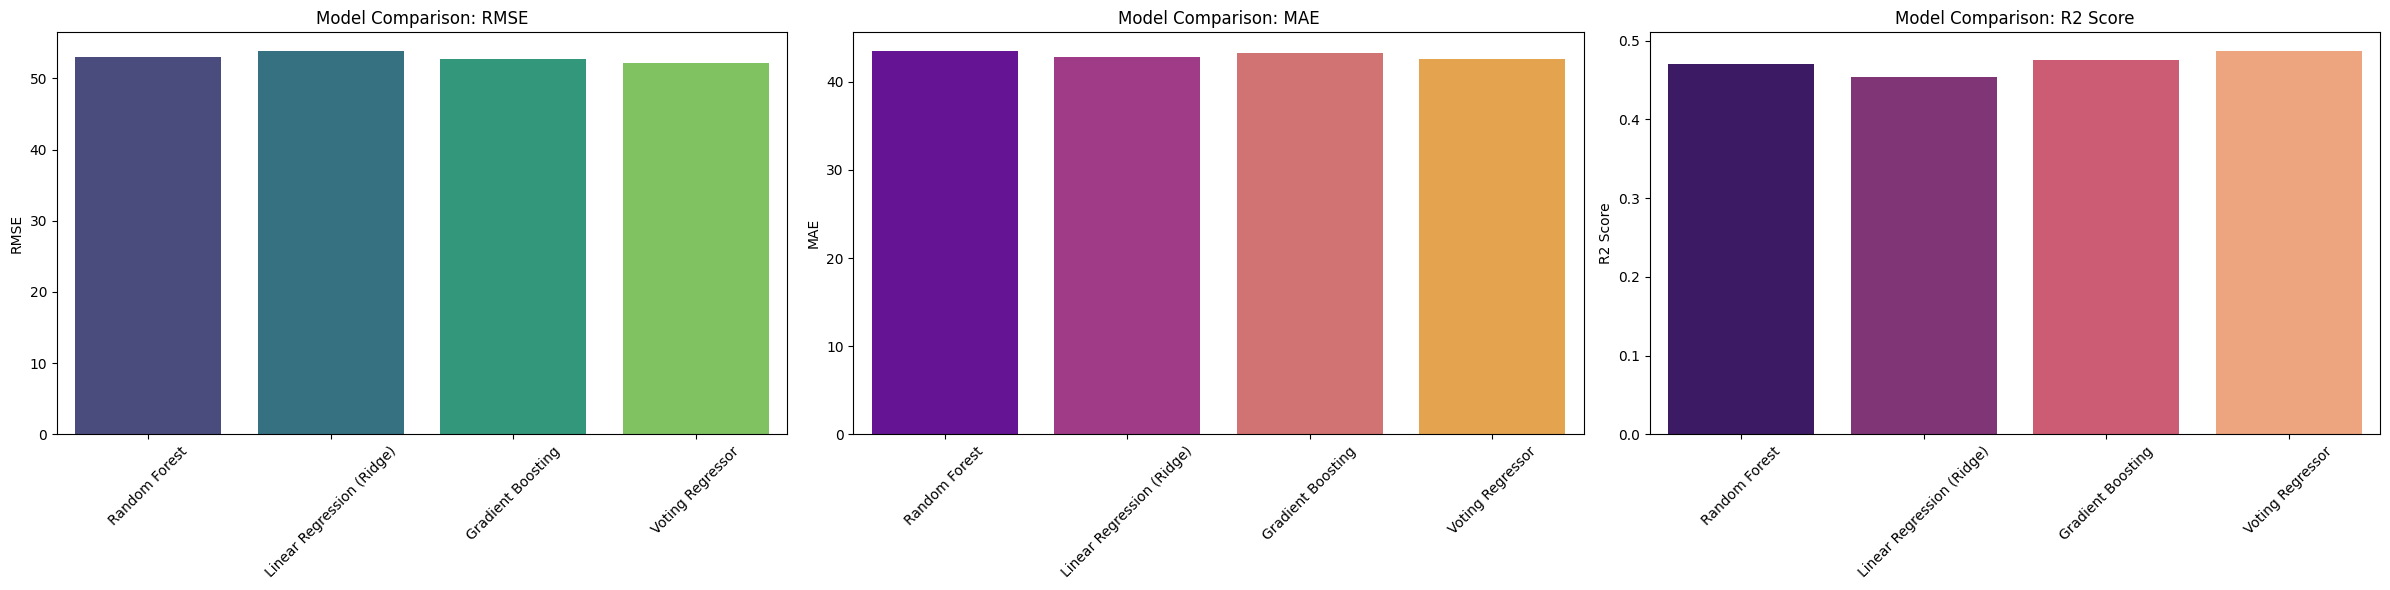

In [63]:
metrics_data = {
    'Model': ['Random Forest', 'Linear Regression (Ridge)', 'Gradient Boosting', 'Voting Regressor'],
    'RMSE': [best_rf_rmse, LR_rmse, best_gbr_rmse, voting_rmse],
    'MAE': [best_rf_mae, LR_mae, best_gbr_mae, voting_mae],
    'R2 Score': [best_rf_r2, LR_r2, best_gbr_r2, voting_r2]
}

metrics_df = pd.DataFrame(metrics_data)

fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False) # R2 score is on a different scale, increased figsize to accommodate new model

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0], palette='viridis', hue='Model', legend=False)
axes[0].set_title('Model Comparison: RMSE')
axes[0].set_ylabel('RMSE')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

# Plot MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[1], palette='plasma', hue='Model', legend=False)
axes[1].set_title('Model Comparison: MAE')
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

# Plot R2 Score
sns.barplot(x='Model', y='R2 Score', data=metrics_df, ax=axes[2], palette='magma', hue='Model', legend=False)
axes[2].set_title('Model Comparison: R2 Score')
axes[2].set_ylabel('R2 Score')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###  Model Saving

The `VotingRegressor`, identified as the best performing model, is saved using `joblib` for future deployment and inference. This allows us to load the trained model without retraining it every time.

In [64]:
import joblib
joblib.dump(voting_reg,'voting_model_diabetes_prediction.pkl')
print("Model dumped successfully!")

Model dumped successfully!
